In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_df = pd.read_csv('/content/raw_house_data.csv')

In [4]:
data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


In [5]:
data_df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [6]:
data_df.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [8]:
data_df.shape

(5000, 16)

In [9]:
#data_df= data_df.dropna()
data_df.count()

,0
MLS,5000
sold_price,5000
zipcode,5000
longitude,5000
latitude,5000
lot_acres,4990
taxes,5000
year_built,5000
bedrooms,5000
bathrooms,4994


In [10]:
data_df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,6


In [11]:
# conversion
data_df['bathrooms'] = pd.to_numeric(data_df['bathrooms'], errors='coerce')
data_df['sqrt_ft'] = pd.to_numeric(data_df['sqrt_ft'], errors='coerce')
data_df['garage'] = pd.to_numeric(data_df['garage'], errors='coerce')
data_df['fireplaces'] = pd.to_numeric(data_df['fireplaces'], errors='coerce')
data_df['HOA'] = pd.to_numeric(data_df['HOA'], errors='coerce')


In [12]:
# Handle missing values
#data_df['bathrooms'].fillna(data_df['bathrooms'].median(), inplace=True)
data_df['bathrooms'].fillna(0, inplace=True)
data_df['sqrt_ft'].fillna(0, inplace=True)
data_df['garage'].fillna(0, inplace=True)
data_df['fireplaces'].fillna(0, inplace=True)
data_df['lot_acres'].fillna(0, inplace=True)
data_df['kitchen_features'].fillna('Unknown', inplace=True)
data_df['floor_covering'].fillna('Unkonwn', inplace=True)
data_df['HOA'].fillna(0, inplace=True)

<ipython-input-12-2f5b70cc8eaa>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['bathrooms'].fillna(0, inplace=True)
<ipython-input-12-2f5b70cc8eaa>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [13]:
data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0.0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,0.0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0.0


In [14]:
data_df = data_df.drop_duplicates()

In [15]:
data_df.duplicated().sum()

0

In [16]:
data_df.shape

(5000, 16)

In [17]:
data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,0.0,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0.0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,0.0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0.0


In [18]:
data_df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0


In [19]:
data_df.to_csv('/content/Cleaned_data.csv',index=False)

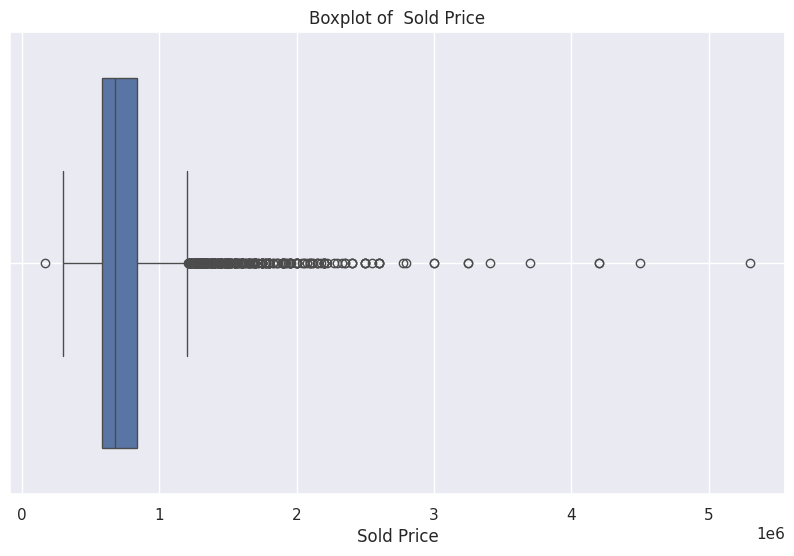

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_df['sold_price'])
plt.title('Boxplot of  Sold Price')
plt.xlabel('Sold Price')
plt.grid(True)
plt.show()

In [21]:
#Identifying outliers numerically using IQR method

Q1 = data_df['sold_price'].quantile(0.25)
Q3 = data_df['sold_price'].quantile(0.75)
IQR = Q3 - Q1

In [22]:
print(IQR)

250000.0


<Axes: xlabel='sold_price'>

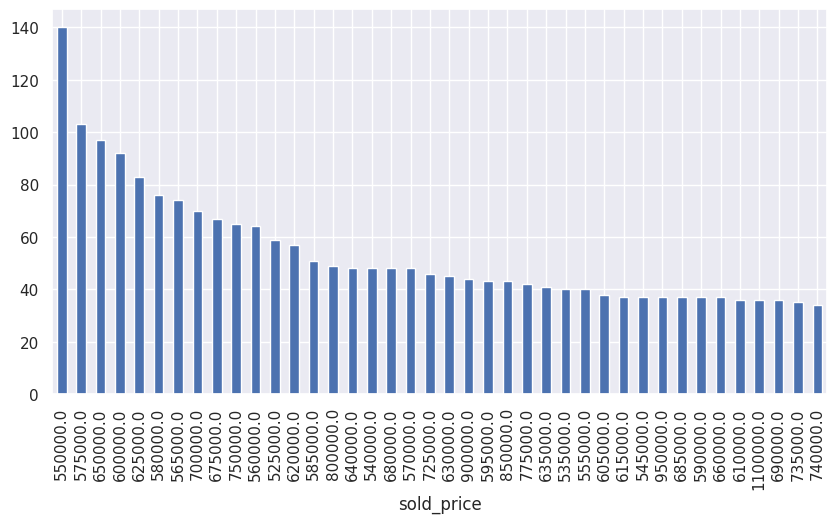

In [23]:
data_df.sold_price.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

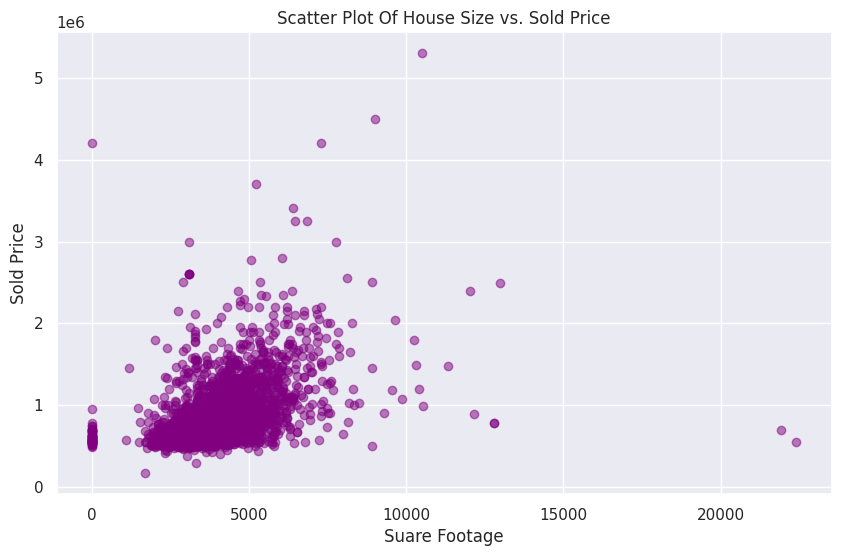

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(data_df['sqrt_ft'],data_df['sold_price'], alpha=0.5, color='purple')
plt.title('Scatter Plot Of House Size vs. Sold Price')
plt.xlabel('Suare Footage')
plt.ylabel('Sold Price')
plt.grid(True)
plt.show()

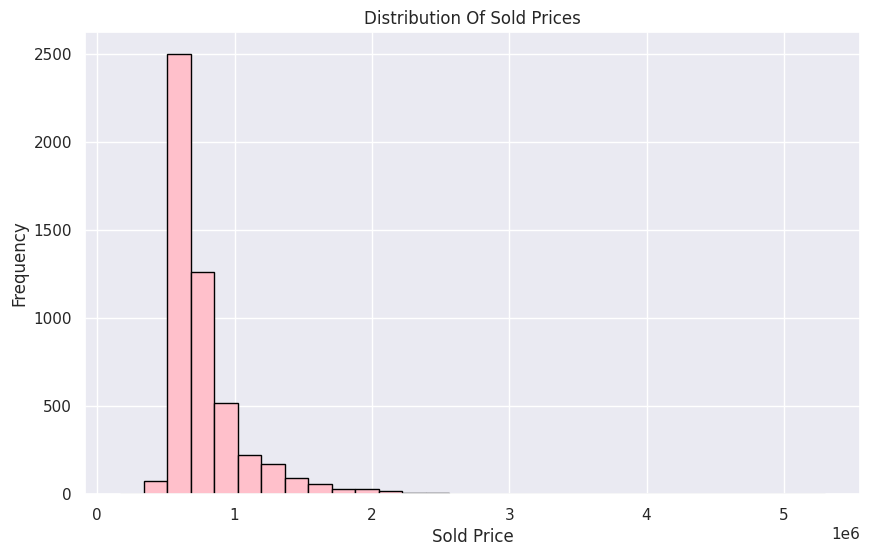

In [25]:
plt.figure(figsize=(10,6))
plt.hist(data_df['sold_price'], bins=30, color='pink', edgecolor= 'black' )
plt.title('Distribution Of Sold Prices')
plt.xlabel('Sold Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

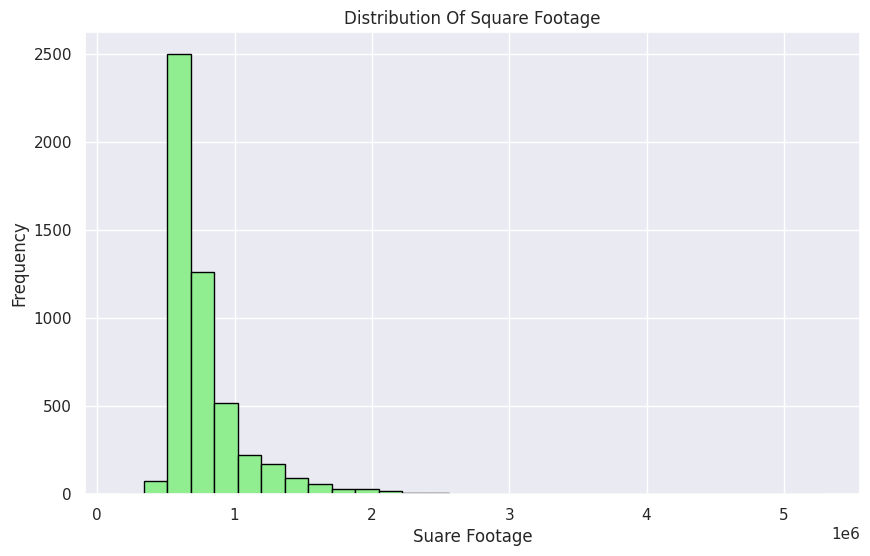

In [26]:
plt.figure(figsize=(10,6))
plt.hist(data_df['sold_price'], bins=30, color='lightgreen', edgecolor= 'black' )
plt.title('Distribution Of Square Footage')
plt.xlabel('Suare Footage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

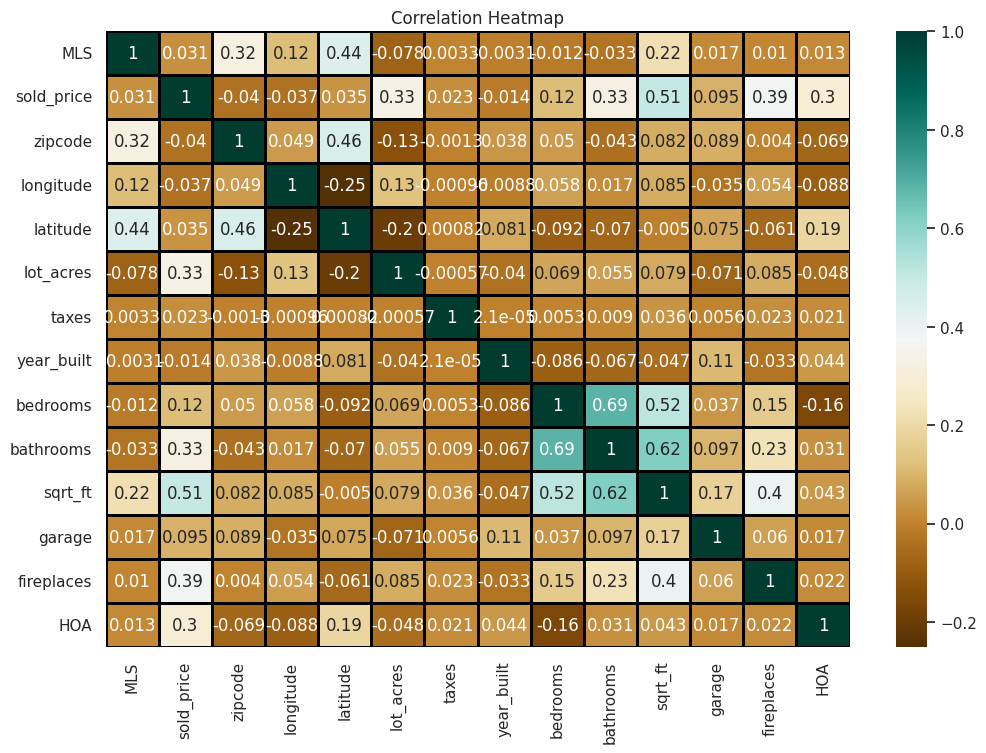

In [27]:
# Select only numeric columns
numeric_df = data_df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="BrBG", annot =True, linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

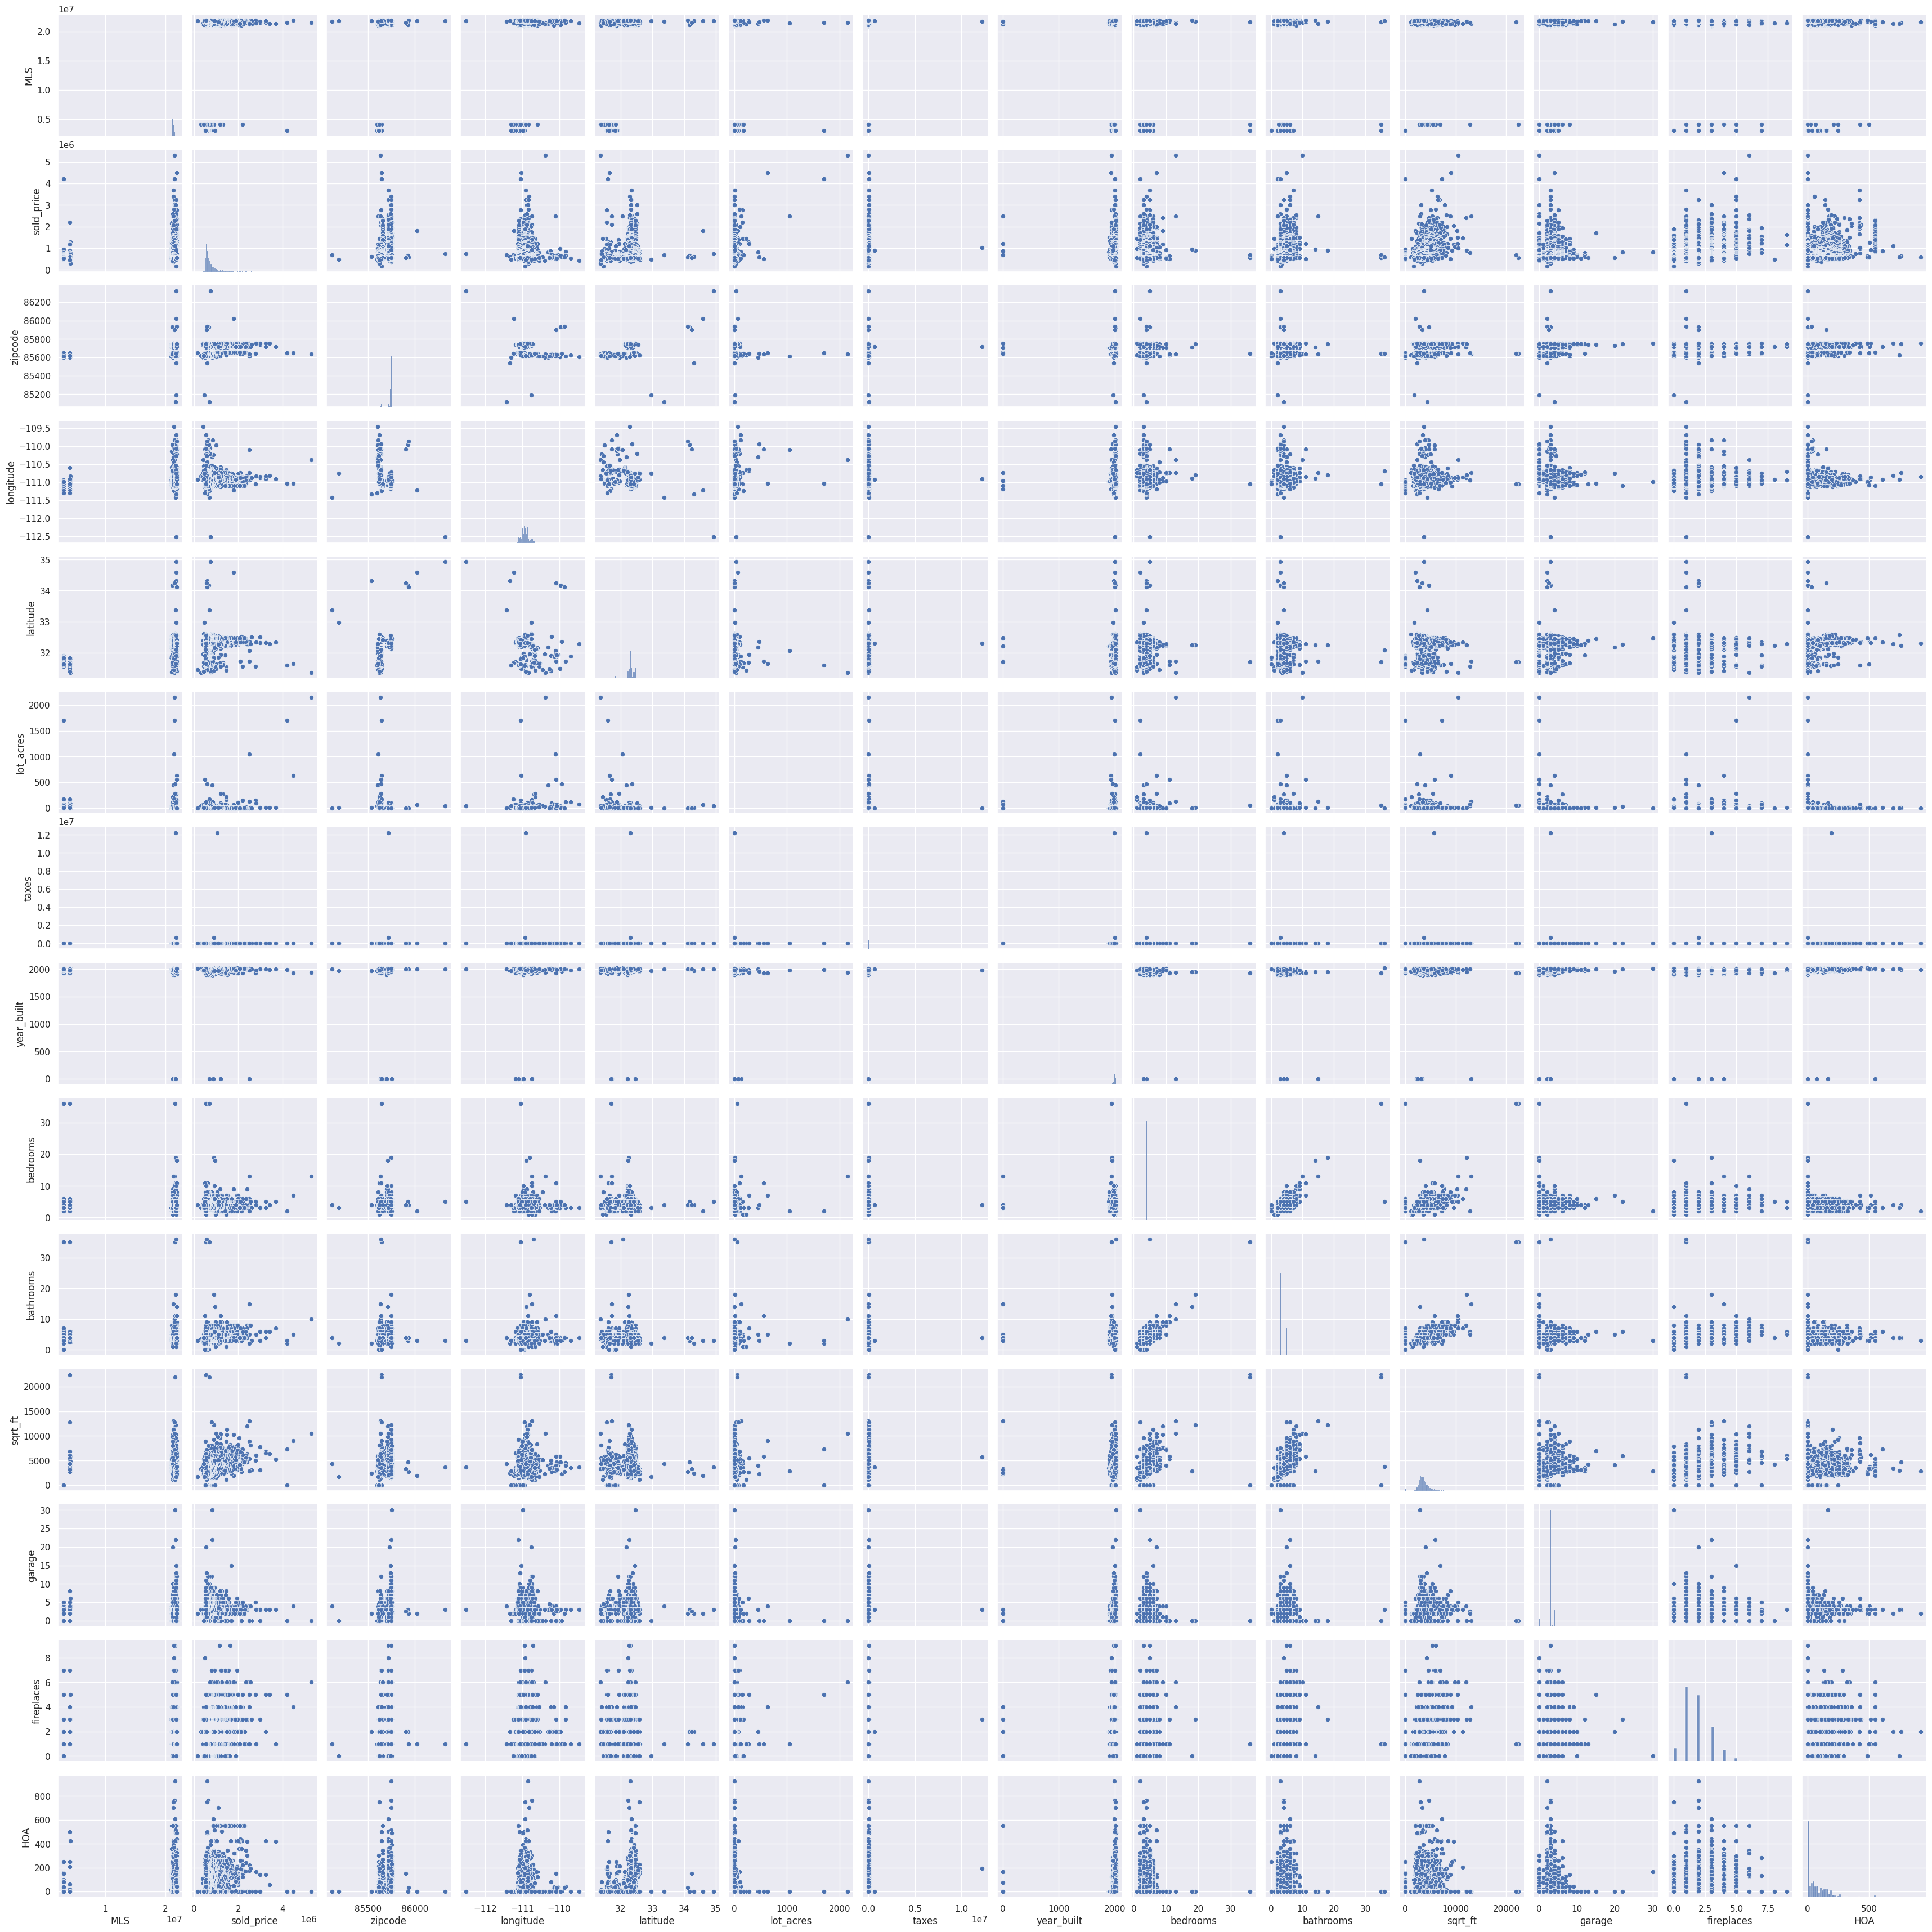

In [28]:
sns.pairplot(data_df)